In [115]:
 !pip install https://download.pytorch.org/whl/cu113/torch-1.11.0%2Bcu113-cp37-cp37m-linux_x86_64.whl
 !pip install https://data.pyg.org/whl/torch-1.11.0%2Bcu113/torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl
 !pip install https://data.pyg.org/whl/torch-1.11.0%2Bcu113/torch_sparse-0.6.13-cp37-cp37m-linux_x86_64.whl
 !pip install git+https://github.com/pyg-team/pytorch_geometric.git@6c6e2cc1c350d97eeeab20f698fb1c506aed441e

from typing import Callable, List, Optional
import os.path as osp
import torch
import pandas as pd
import os
from sklearn.pipeline import Pipeline
import sys
from torch_geometric.data import (HeteroData, InMemoryDataset, download_url,
                                  extract_zip)

device = 'cuda' if torch.cuda.is_available() else 'cpu'


sys.path.append("/content/drive/MyDrive/cdt-gnn-returns/notebooks")

from asos_pyg import ASOSData_pyg
from random_link_transform import RandomLinkSplit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tcmalloc: large alloc 1636958208 bytes == 0x2744000 @  0x7f9b6a7fc1e7 0x4a3940 0x5b438c 0x5ea94f 0x5939cb 0x594cd3 0x5d0ecb 0x59aeca 0x515655 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x549e0e 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549e0e 0x4bca8a 0x59c019
tcmalloc: large alloc 1636958208 bytes == 0x64064000 @  0x7f9b6a7fc1e7 0x4a3940 0x5b438c 0x64cfe7 0x59b076 0x515655 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x549e0e 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549e0e 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576
tcmalloc: large alloc 1636958208 bytes == 0xc5984000 @  0x7f9b6a7fc1e7 0x4a3940 0x59b5e2 0x63a515 0x63bd66 0x63be16 0x59afff 0x515655 0x593dd7 0x511e2c 0x549576 0x593fce 0x548ae9 0x5127f1 0x593dd7 0x5118f8 0x593dd7 0x511

In [ ]:
os.getcwd()

'/content'

In [118]:
# Because of the way PyG constructs these datasets, you need to process 
# the data and then load it in again after processing. That is why we have
# two calls to ASOSData_pyg() here.

gnnData = ASOSData_pyg(load_path="/content/drive/MyDrive/cdt-gnn-returns/",
#                               customer_transforms=customer_transforms,
#                               product_transforms=product_transforms,
                              product_links="virtual",
                              country_links="virtual")
gnnData.process()
gnnData = ASOSData_pyg(load_path="/content/drive/MyDrive/cdt-gnn-returns/", 
#                               customer_transforms=customer_transforms,
#                               product_transforms=product_transforms,
                              product_links="virtual",
                              country_links="virtual")
dataset = gnnData.data
dataset

HeteroData(
  product={
    x=[82570, 40],
    num_nodes=82570,
    node_index=[82570]
  },
  country={
    x=[10, 19],
    num_nodes=10,
    node_index=[10]
  },
  customer={
    x=[182699, 19],
    num_nodes=182699,
    node_index=[182699]
  },
  variant={
    x=[190260, 41],
    num_nodes=190260,
    node_index=[190260]
  },
  (variant, belongs_to, product)={ edge_index=[2, 190260] },
  (product, includes, variant)={ edge_index=[2, 190260] },
  (customer, is_from, country)={ edge_index=[2, 182699] },
  (country, from_is, customer)={ edge_index=[2, 182699] },
  (customer, purchases, variant)={
    edge_index=[2, 174473],
    edge_label=[174473]
  },
  (variant, purchased_by, customer)={ edge_index=[2, 174473] },
  (customer, returns, variant)={ edge_index=[2, 98715] },
  (variant, returned_by, customer)={ edge_index=[2, 98715] }
)

In [ ]:
dataset.to(device)

HeteroData(
  product={
    x=[82570, 40],
    num_nodes=82570,
    node_index=[82570]
  },
  country={
    x=[10, 19],
    num_nodes=10,
    node_index=[10]
  },
  customer={
    x=[182699, 19],
    num_nodes=182699,
    node_index=[182699]
  },
  variant={
    x=[190260, 41],
    num_nodes=190260,
    node_index=[190260]
  },
  (variant, belongs_to, product)={ edge_index=[2, 190260] },
  (product, includes, variant)={ edge_index=[2, 190260] },
  (customer, is_from, country)={ edge_index=[2, 182699] },
  (country, from_is, customer)={ edge_index=[2, 182699] },
  (customer, purchases, variant)={
    edge_index=[2, 174473],
    edge_label=[174473]
  },
  (variant, purchased_by, customer)={ edge_index=[2, 174473] },
  (customer, returns, variant)={ edge_index=[2, 98715] },
  (variant, returned_by, customer)={ edge_index=[2, 98715] }
)

In [117]:
gnnData_test = ASOSData_pyg(load_path="/content/drive/MyDrive/cdt-gnn-returns/",
                       test=True,
#                               customer_transforms=customer_transforms,
#                               product_transforms=product_transforms,
                              product_links="virtual",
                              country_links="virtual")
gnnData_test.process()
gnnData_test = ASOSData_pyg(load_path="/content/drive/MyDrive/cdt-gnn-returns/", 
                            test=True,
#                               customer_transforms=customer_transforms,
#                               product_transforms=product_transforms,
                              product_links="virtual",
                              country_links="virtual")
testdataset = gnnData_test.data
testdataset

HeteroData(
  product={
    x=[82570, 40],
    num_nodes=82570,
    node_index=[82570]
  },
  country={
    x=[10, 19],
    num_nodes=10,
    node_index=[10]
  },
  customer={
    x=[182699, 19],
    num_nodes=182699,
    node_index=[182699]
  },
  variant={
    x=[190260, 41],
    num_nodes=190260,
    node_index=[190260]
  },
  (variant, belongs_to, product)={ edge_index=[2, 190260] },
  (product, includes, variant)={ edge_index=[2, 190260] },
  (customer, is_from, country)={ edge_index=[2, 182699] },
  (country, from_is, customer)={ edge_index=[2, 182699] },
  (customer, purchases, variant)={
    edge_index=[2, 74775],
    edge_label=[74775]
  },
  (variant, purchased_by, customer)={ edge_index=[2, 74775] },
  (customer, returns, variant)={ edge_index=[2, 42300] },
  (variant, returned_by, customer)={ edge_index=[2, 42300] }
)

In [ ]:
from torch_geometric.nn import MetaPath2Vec

# metapath = [
#     #  ("customer", "purchases", "variant"),
#     #  ("variant", "purchased_by", "customer"),
#     ("customer", "returns", "variant"),
#      ("variant", "belongs_to", "product"),
#      ("product", "includes", "variant"),
#     ("variant", "returned_by", "customer"),
#     # ("customer", "is_from", "country"),
#     # ("country", "from_is", "customer"),
# ]


metapath = [
    #  ("customer", "purchases", "variant"),
    #  ("variant", "purchased_by", "customer"),
     ("customer", "returns", "variant"),
    #  ("variant", "belongs_to", "product"),
    #  ("product", "includes", "variant"),
    ("variant", "returned_by", "customer"),
    # ("customer", "is_from", "country"),
    # ("country", "from_is", "customer"),
]

# model = MetaPath2Vec(dataset.edge_index_dict,
#                      embedding_dim=128,
#                      metapath=metapath,
#                      walk_length=15,
#                      context_size=7,
#                      walks_per_node=30,
#                      num_negative_samples=5,
#                      sparse=True).to(device)


model = MetaPath2Vec(dataset.edge_index_dict,
                     embedding_dim=128,
                     metapath=metapath,
                     walk_length=10,
                     context_size=7,
                     walks_per_node=5,
                     num_negative_samples=5,
                     sparse=True).to(device)

In [ ]:
loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

In [ ]:
next(iter(loader))

(tensor([[ 54124, 372959, 372959,  ..., 372959, 372959, 372959],
         [156482, 372959, 372959,  ..., 372959, 372959, 372959],
         [ 20998, 372959, 372959,  ..., 372959, 372959, 372959],
         ...,
         [141425, 357676, 141425,  ..., 141425, 357676, 141425],
         [372959, 372959, 372959,  ..., 372959, 372959, 372959],
         [372959, 372959, 372959,  ..., 372959, 372959, 372959]]),
 tensor([[ 54124, 222168,  20527,  ..., 181091, 305179,  48633],
         [156482, 318724,  46882,  ...,   2248, 340312, 113303],
         [ 20998, 261216, 171553,  ..., 133428, 207131,  75288],
         ...,
         [ 14390, 288334, 103197,  ..., 118560, 223560,  63830],
         [171820, 312393,  41936,  ...,  47491, 233132,    125],
         [ 73616, 328563,  92915,  ...,  20390, 356431,  95949]]))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. link embeddings
def link_examples_to_features(link_examples, customer_node, variant_node, binary_operator):
    return np.array([
        binary_operator(customer_node[src], variant_node[dst])
        for src, dst in link_examples
    ])

def link_prediction_classifier(max_iter = 2000):
    lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=max_iter, 
                                  solver="lbfgs", penalty='l2')
    
    return Pipeline(steps=[("clf", lr_clf)])

# 2. training classifier
def train_link_prediction_model(link_examples, link_labels, customer_node, variant_node, binary_operator):
    clf = link_prediction_classifier()
    link_features = link_examples_to_features(
        link_examples, customer_node.numpy(), variant_node.numpy(), binary_operator
    )
    clf.fit(link_features, link_labels)
    return clf

# 3. and 4. evaluate classifier
def evaluate_link_prediction_model(
    clf, link_examples_test, link_labels_test, customer_node, variant_node, binary_operator
):
    link_features_test = link_examples_to_features(
        link_examples_test, customer_node.numpy(), variant_node.numpy(), binary_operator)
    score = evaluate_scores(clf, link_features_test, link_labels_test)
    return score

def evaluate_scores(clf, link_features, link_labels):
    y_pred = clf.predict(link_features)

    return {
        "accuracy": accuracy_score(link_labels, y_pred),
        "f1_score": f1_score(link_labels, y_pred),
        "precision": precision_score(link_labels, y_pred),
        "recall": recall_score(link_labels, y_pred),
        "predictions" : y_pred
    }

def evaluate_roc_auc(clf, link_features, link_labels):
    predicted = clf.predict_proba(link_features)

    # check which class corresponds to positive links
    positive_column = list(clf.classes_).index(1)
    return roc_auc_score(link_labels, predicted[:, positive_column])

    
def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def run_link_prediction(binary_operator, examples, labels, customer_node, variant_node, examples_test, labels_test):
    clf = train_link_prediction_model(
        examples, labels, customer_node, variant_node, binary_operator
    )
    score = evaluate_link_prediction_model(
        clf,
        examples_test,
        labels_test,
        customer_node, variant_node,
        binary_operator,
    )

    return {
        "classifier": clf,
        "binary_operator": binary_operator,
        "score": score,
    }


binary_operators = [operator_l1, operator_l2]

In [ ]:
import numpy as np
def train(epoch, log_steps=500, eval_steps=1000):
    model.train()
    loss_list = []
    total_loss = 0
    for i, (pos_rw, neg_rw) in enumerate(loader):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        #loss_list.append(loss)
        loss.backward()
        optimizer.step()

        # total_loss += loss.item()
        # if (i + 1) % log_steps == 0:
        #     print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
        #            f'Loss: {total_loss / log_steps:.4f}'))
        #     total_loss = 0

        # if (i + 1) % eval_steps == 0:
        #     acc, f1 = test()
        #     print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
        #            f'Acc: {acc:.4f}, F1 score: {f1:.3f}'))
    # print(loss)
    return(loss)



@torch.no_grad()
def test(train_ratio=0.1):
    model.eval()

    z_customer = model('customer', batch=dataset.node_index_dict['customer'].to(device)).detach()
    z_product = model('variant', batch=dataset.node_index_dict['variant'].to(device)).detach()

    z = dataset.edge_index_dict["customer", "purchases", "variant"].T
    z_test = testdataset.edge_index_dict["customer", "purchases", "variant"].T

    perm = torch.randperm(z.size(0))
    train_perm = perm[:int(z.size(0) * 0.3)]
    # test_perm = perm[int(z.size(0) * 0.3):]
    
    examples = z[train_perm]
    labels = dataset.edge_label_dict["customer", "purchases", "variant"][train_perm]

    examples_test = z_test
    labels_test = testdataset.edge_label_dict["customer", "purchases", "variant"]
    
    # examples_test = z[test_perm]
    # labels_test = dataset.edge_label_dict["customer", "purchases", "variant"][test_perm]
    
    
    # emb_128 = np.concatenate((z_customer.cpu().numpy(), z_product.cpu().numpy()), axis=0)

    scores = run_link_prediction(operator_l1, examples.cpu(), labels.cpu(), z_customer.cpu(), z_product.cpu(), examples_test.cpu(), labels_test.cpu())["score"]
    # scores = run_link_prediction(operator_l1, examples.cpu(), labels.cpu(), emb_128, examples.cpu(), labels.cpu())["score"]


    return scores["accuracy"], scores["f1_score"], scores["precision"], scores["recall"], scores["predictions"]
   

# def test_on_train(train_ratio=0.1):
#     model.eval()

#     z_customer = model('customer', batch=dataset.node_index_dict['customer'].to(device)).detach()
#     z_product = model('variant', batch=dataset.node_index_dict['variant'].to(device)).detach()
    
#     examples = dataset.edge_index_dict["customer", "purchases", "variant"].T
#     labels = dataset.edge_label_dict["customer", "purchases", "variant"]
    
#     emb_128 = np.concatenate((z_customer.cpu().numpy(), z_product.cpu().numpy()), axis=0)

#     #scores = run_link_prediction(operator_l1, examples.cpu(), labels.cpu(), emb_128, examples_test.cpu(), labels_test.cpu())["score"]
#     scores = run_link_prediction(operator_l1, examples.cpu(), labels.cpu(), emb_128, examples.cpu(), labels.cpu())["score"]


#     return scores["accuracy"], scores["f1_score"], scores["precision"], scores["recall"], scores["predictions"]

In [ ]:
num_epoch = 100
loss_list = []
for epoch in range(1, num_epoch+1):
    loss = train(epoch)
    if epoch%2 == 0:
      acc, f1, precision, recall, preds = test()
      # acc2, f12, precision2, recall2, preds = test_on_train()
      # print(f'Epoch: {epoch}, Train acc: {100*acc2:.2f}%, Train F1 score: {f12:.3f}, Train Precision: {precision2:.3f}, Train Recall: {recall2:.3f}')
      print(f'Epoch: {epoch}, Test acc : {100*acc:.2f}%,  Test F1 score : {f1:.3f},  Test Precision : {precision:.3f},  Test Recall : {recall:.3f}')
    loss_list.append(loss)
    # test()
    # print(epoch)
    # if epoch%10 == 0:

Epoch: 2, Test acc : 56.54%,  Test F1 score : 0.722,  Test Precision : 0.566,  Test Recall : 0.997
Epoch: 4, Test acc : 54.61%,  Test F1 score : 0.603,  Test Precision : 0.597,  Test Recall : 0.610
Epoch: 6, Test acc : 54.33%,  Test F1 score : 0.584,  Test Precision : 0.602,  Test Recall : 0.566
Epoch: 8, Test acc : 54.19%,  Test F1 score : 0.569,  Test Precision : 0.608,  Test Recall : 0.535
Epoch: 10, Test acc : 54.53%,  Test F1 score : 0.576,  Test Precision : 0.610,  Test Recall : 0.546
Epoch: 12, Test acc : 54.55%,  Test F1 score : 0.579,  Test Precision : 0.608,  Test Recall : 0.552


KeyboardInterrupt: ignored

In [ ]:
num_epoch = 100
loss_list = []
for epoch in range(1, num_epoch+1):
    loss = train(epoch)
    if epoch%2 == 0:
      acc, f1, precision, recall, preds = test()
      # acc2, f12, precision2, recall2, preds = test_on_train()
      # print(f'Epoch: {epoch}, Train acc: {100*acc2:.2f}%, Train F1 score: {f12:.3f}, Train Precision: {precision2:.3f}, Train Recall: {recall2:.3f}')
      print(f'Epoch: {epoch}, Test acc : {100*acc:.2f}%,  Test F1 score : {f1:.3f},  Test Precision : {precision:.3f},  Test Recall : {recall:.3f}')
    loss_list.append(loss)
    # test()
    # print(epoch)
    # if epoch%10 == 0:

Epoch: 2, Test acc : 49.45%,  Test F1 score : 0.522,  Test Precision : 0.535,  Test Recall : 0.510
Epoch: 4, Test acc : 49.87%,  Test F1 score : 0.555,  Test Precision : 0.534,  Test Recall : 0.578
Epoch: 6, Test acc : 50.51%,  Test F1 score : 0.593,  Test Precision : 0.535,  Test Recall : 0.665
Epoch: 8, Test acc : 50.31%,  Test F1 score : 0.579,  Test Precision : 0.535,  Test Recall : 0.630


In [ ]:


z_customer = model('customer', batch=dataset.node_index_dict['customer']).detach()
z_product = model('variant', batch=dataset.node_index_dict['variant']).detach()
train_examples = dataset.edge_index_dict["customer", "purchases", "variant"].T
train_labels = dataset.edge_label_dict["customer", "purchases", "variant"]

# perm = torch.randperm(examples.size(0))
# train_perm = perm[:int(examples.size(0) * train_ratio)]
# test_perm = perm[int(examples.size(0) * train_ratio):]


# train_examples = examples
# train_labels = labels[train_perm]
examples_test = testdataset.edge_index_dict["customer", "purchases", "variant"].T
labels_test = testdataset.edge_label_dict["customer", "purchases", "variant"]


emb_128 = np.concatenate((z_customer.cpu().numpy(), z_product.cpu().numpy()), axis=0)

np_labels = train_labels.cpu().numpy()
np_labels_test = labels_test.cpu().numpy()
# train embeddings
edge_embeddings = link_examples_to_features(train_examples.cpu(), z_customer.cpu(), z_product.cpu(), operator_l1)
np_edge_embeddings = np.array(edge_embeddings)
positive_embeddings = []
negative_embeddings = []
for i in range(len(np_edge_embeddings)):
  if np_labels[i] == 0:
    negative_embeddings.append(np_edge_embeddings[i])
  else:
    positive_embeddings.append(np_edge_embeddings[i])

# test embeddings
edge_embeddings_test = link_examples_to_features(examples_test.cpu(),z_customer.cpu(), z_product.cpu(), operator_l1)
np_edge_embeddings_test = np.array(edge_embeddings_test)
positive_embeddings_test = []
negative_embeddings_test = []

for i in range(len(np_edge_embeddings_test)):
  if np_labels_test[i] == 0:
    negative_embeddings_test.append(np_edge_embeddings_test[i])
  else:
    positive_embeddings_test.append(np_edge_embeddings_test[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


In [ ]:
newlist = []
for ele in edge_embeddings_test:
  newlist.append(ele.cpu().detach().numpy())
newlist

[array([0.85770226, 0.28649843, 0.29460174, 1.848862  , 0.44381294,
        1.4579551 , 0.59334016, 1.2689217 , 0.38525113, 0.48862824,
        0.95382977, 1.0977347 , 1.1037275 , 1.9159727 , 0.15149789,
        0.42469084, 0.03124386, 0.47848153, 0.38921547, 0.4860617 ,
        0.4695032 , 0.04094428, 0.05275176, 1.6010075 , 0.44712156,
        1.051929  , 0.7797666 , 0.99756634, 0.63786685, 0.60558504,
        0.06191144, 0.9855454 , 0.56344384, 0.39997393, 0.4079516 ,
        0.46715474, 0.3187262 , 0.37367675, 0.9262501 , 0.63041955,
        1.8424344 , 0.40993783, 0.9060012 , 1.1573921 , 1.6401007 ,
        2.6671147 , 1.0310606 , 2.679335  , 0.08942914, 1.3131611 ,
        0.99431515, 1.1297383 , 0.5820749 , 0.19976203, 0.5938476 ,
        0.5580273 , 0.7952386 , 1.1241906 , 0.49787936, 0.13515261,
        1.2402818 , 0.72142106, 2.0502546 , 0.552024  , 0.25327083,
        0.27508846, 1.0256618 , 0.40027583, 0.25000232, 0.36236697,
        0.51976156, 0.4352352 , 0.6707743 , 0.43

In [ ]:
newlist.shape()

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


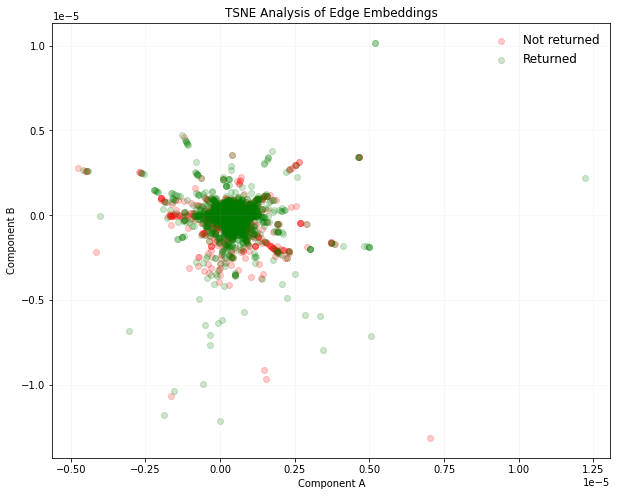

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
tsne = TSNE()
emb2d = tsne.fit_transform(newlist)

cdict = {0: "red", 1: "green"}
labeldict = {0: "Not returned", 1: "Returned"}

fig = plt.figure(figsize=(10,8))
ax = fig.gca()
for i in range(0,2):
    ix = np.where(np_labels_test == i)
    ax.scatter(emb2d[ix,0],emb2d[ix,1], marker="o", alpha=0.2, color=cdict[i], label=labeldict[i])
ax.set_title("TSNE Analysis of Edge Embeddings")
ax.legend(fontsize=12, frameon=False)
ax.set_xlabel("Component A")
ax.set_ylabel("Component B")
ax.grid(True, alpha=0.1)
plt.show()